## Spotify Dataset Analysis

### This dataset was taken from Kaggle. It is a comprehensive collection of Spotify tracks across various genres. We are going to be perfomring an Exploratory Data Analysis on this dataset.

In [2]:
# import numpy
import numpy as np


# import pandas
import pandas as pd

# import matplotlib
import matplotlib.pyplot as plt

# import seaborn
import seaborn as sns

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

In [3]:
df_spotify = pd.read_csv('spotify_tracks.csv')
df_spotify.head()

id                                           name  \
0  7kr3xZk4yb3YSZ4VFtg2Qt                                       Acoustic   
1  1kJygfS4eoVziBBI93MSYp                                       Acoustic   
2  6lynns69p4zTCRxmmiSY1x                  Here Comes the Sun - Acoustic   
3  1RC9slv335IfLce5vt9KTW                                    Acoustic #3   
4  5o9L8xBuILoVjLECSBi7Vo  My Love Mine All Mine - Acoustic Instrumental   

      genre                        artists  \
0  acoustic                  Billy Raffoul   
1  acoustic                  Billy Raffoul   
2  acoustic  Molly Hocking, Bailey Rushlow   
3  acoustic              The Goo Goo Dolls   
4  acoustic  Guus Dielissen, Casper Esmann   

                                           album  popularity  duration_ms  \
0                                           1975          58       172199   
1                        A Few More Hours at YYZ          57       172202   
2                  Here Comes the Sun (Acoustic)          42       144786   
3                              Dizzy up the Girl          46       116573   
4  My Love Mine All Mine (Acoustic Instrumental)          33       133922   

   explicit  
0     False  
1     False  
2     False  
3     False  
4     False

### Data Overview:

In [4]:
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           6300 non-null   object
 1   name         6300 non-null   object
 2   genre        6300 non-null   object
 3   artists      6300 non-null   object
 4   album        6300 non-null   object
 5   popularity   6300 non-null   int64 
 6   duration_ms  6300 non-null   int64 
 7   explicit     6300 non-null   bool  
dtypes: bool(1), int64(2), object(5)
memory usage: 350.8+ KB


Here, we can see that the 'duration_ms', despite being milliseconds is of int64 type. So let us convert to the hh:mm:ss format.

In [5]:
def ms_to_hhmmss(ms):
    seconds = ms // 1000
    minutes = seconds // 60
    hours = minutes // 60
    minutes = minutes % 60
    seconds = seconds % 60
    return f"{int(hours):02d}:{int(minutes):02d}:{int(seconds):02d}"

# Apply the function to the duration_ms column
df_spotify['duration_hhmmss'] = df_spotify['duration_ms'].apply(ms_to_hhmmss)

In [6]:
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               6300 non-null   object
 1   name             6300 non-null   object
 2   genre            6300 non-null   object
 3   artists          6300 non-null   object
 4   album            6300 non-null   object
 5   popularity       6300 non-null   int64 
 6   duration_ms      6300 non-null   int64 
 7   explicit         6300 non-null   bool  
 8   duration_hhmmss  6300 non-null   object
dtypes: bool(1), int64(2), object(6)
memory usage: 400.0+ KB


Now, we see that the duration_ms has been converted to duration_hhmmss.

In [7]:
df_spotify['duration_hhmmss'] = pd.to_timedelta(df_spotify['duration_hhmmss'])

In [8]:
df_spotify['duration_hhmmss'].head()

0   0 days 00:02:52
1   0 days 00:02:52
2   0 days 00:02:24
3   0 days 00:01:56
4   0 days 00:02:13
Name: duration_hhmmss, dtype: timedelta64[ns]

In [9]:
df_spotify.columns

Index(['id', 'name', 'genre', 'artists', 'album', 'popularity', 'duration_ms',
       'explicit', 'duration_hhmmss'],
      dtype='object')

Now, we have our duration in terms of hh:mm:ss format.

Sure, here are 20 questions to help you practice Exploratory Data Analysis (EDA) using your Spotify dataset:

### Univariate Analysis
1. What is the distribution of song popularity in the dataset?
2. What is the average duration of songs in the dataset in `hh:mm:ss` format?
3. How many songs are marked as explicit versus non-explicit?
4. What is the distribution of song durations in the dataset?
5. What are the top 10 most popular songs in the dataset?
6. How many unique artists are present in the dataset?
7. Which genre has the most songs in the dataset?
8. What is the distribution of song popularity scores (e.g., using a histogram)?
9. How many songs are there in total in the dataset?
10. What is the median duration of songs in the dataset?

### Bivariate Analysis
11. Is there a correlation between song duration and popularity?
12. How does the popularity of songs vary across different genres?
13. What is the relationship between the number of songs an artist has and their average popularity?
14. Do explicit songs tend to be more or less popular than non-explicit songs?
15. How does the duration of songs vary across different genres?
16. How do different albums by the same artist compare in terms of popularity?
17. What is the distribution of song durations for explicit and non-explicit songs?
18. How does the number of songs in an album correlate with the album's average popularity?

### Multivariate Analysis
19. How do genre and duration collectively affect the popularity of a song?
20. What are the top genres by average song popularity, and how do they compare in terms of song duration?

### Advanced Analysis
21. Which artist has the highest average song popularity?
22. What is the average popularity of songs for the top 5 most frequent genres?
23. How do the top 10% most popular songs compare to the rest in terms of duration and explicit content?
24. Are there any significant outliers in song duration or popularity?
25. How do different combinations of genres and explicit content affect song popularity?
26. What are the top 5 albums with the highest average song popularity?
27. How does the average song duration differ between genres with the highest and lowest average popularity?
28. How does the distribution of song popularity scores differ between the top 5 most common genres?
29. What is the distribution of the number of songs per artist?
30. How do the popularity distributions differ for songs released by different artists?

These questions should provide a comprehensive guide to exploring your Spotify dataset and gaining insights from it.

## Univariate Analysis

### Now, we will analyse each variable one-by-one.

In [10]:
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   id               6300 non-null   object         
 1   name             6300 non-null   object         
 2   genre            6300 non-null   object         
 3   artists          6300 non-null   object         
 4   album            6300 non-null   object         
 5   popularity       6300 non-null   int64          
 6   duration_ms      6300 non-null   int64          
 7   explicit         6300 non-null   bool           
 8   duration_hhmmss  6300 non-null   timedelta64[ns]
dtypes: bool(1), int64(2), object(5), timedelta64[ns](1)
memory usage: 400.0+ KB


### 1. What is the distribution of song popularity in the dataset?

In [11]:
df_spotify['popularity']

0       58
1       57
2       42
3       46
4       33
5       14
6        0
7       29
8       15
9       45
10      39
11       8
12       0
13      25
14       5
15      71
16      25
17       3
18      63
19      27
20      16
21      71
22      31
23      10
24      68
25      13
26       1
27      61
28      13
29       1
30       0
31      24
32       1
33      58
34      17
35       3
36      29
37      25
38       0
39      65
40      18
41       2
42      57
43      30
44       0
45       0
46      25
47       0
48      56
49      14
50      28
51       2
52      68
53      21
54      30
55      69
56       8
57      25
58      69
59       3
60      26
61      68
62       4
63      65
64       0
65      20
66      62
67       1
68      32
69      57
70       0
71       0
72      67
73       0
74      17
75      56
76       3
77      20
78      55
79       1
80      53
81      11
82       0
83      63
84       2
85       0
86      54
87       0
88       0
89      57
90       0

<Axes: xlabel='popularity', ylabel='Count'>

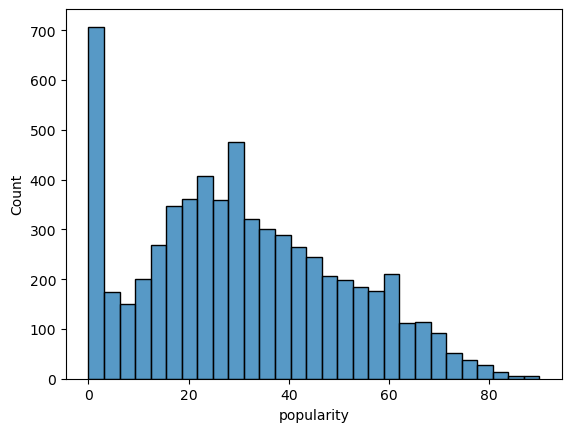

In [12]:
sns.histplot(data=df_spotify, x='popularity', palette='viridis')

We can see a Gaussian Distribution in the above with a steep increase in the popularity near 0, meaning that there are nearly 700 songs with popularity around and near 0.

In [13]:
df_spotify['popularity'].describe()

count    6300.000000
mean       30.754762
std        19.948991
min         0.000000
25%        16.000000
50%        29.000000
75%        45.000000
max        90.000000
Name: popularity, dtype: float64

The average popularity of all the songs is 30.7547 while half of the songs have popularity below 29. The highest popularity recorded is 90 while the lowest is 0.

### 2. What is the average duration of songs in the dataset in hh:mm:ss format?

In [14]:
df_spotify['duration_hhmmss'].describe()

count                         6300
mean     0 days 00:03:22.386349206
std      0 days 00:02:01.030371353
min                0 days 00:00:30
25%                0 days 00:02:27
50%                0 days 00:03:11
75%                0 days 00:03:56
max                0 days 01:00:01
Name: duration_hhmmss, dtype: object

Here, the average duration of songs is 3 minutes and 22 seconds.

### 3. How many songs are marked as explicit versus non-explicit?

In [15]:
df_spotify['explicit'].value_counts()

explicit
False    5106
True     1194
Name: count, dtype: int64

From the dataset, we can see that 5106 songs are not explicit while the rest 1194 are marked as explicit.

### 4. What is the distribution of song durations in the dataset?

In [16]:
df_spotify['duration_hhmmss'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6300 entries, 0 to 6299
Series name: duration_hhmmss
Non-Null Count  Dtype          
--------------  -----          
6300 non-null   timedelta64[ns]
dtypes: timedelta64[ns](1)
memory usage: 49.3 KB


In [17]:
df_spotify.columns

Index(['id', 'name', 'genre', 'artists', 'album', 'popularity', 'duration_ms',
       'explicit', 'duration_hhmmss'],
      dtype='object')

In [19]:
#df_spotify = df_spotify.drop('duration_timedelta', axis=1)

In [20]:
df_spotify.columns

Index(['id', 'name', 'genre', 'artists', 'album', 'popularity', 'duration_ms',
       'explicit', 'duration_hhmmss'],
      dtype='object')

<Axes: xlabel='duration_hhmmss', ylabel='Count'>

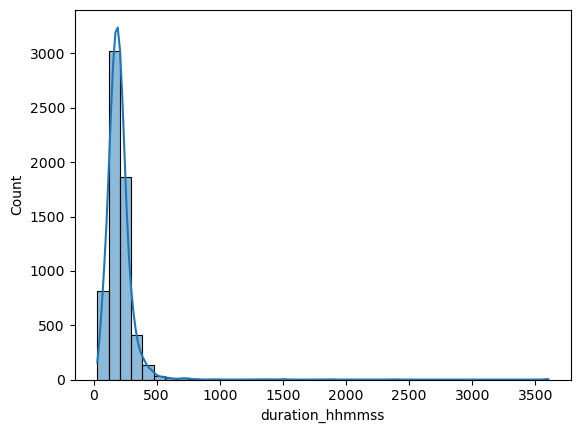

In [21]:
sns.histplot(df_spotify['duration_hhmmss'].dt.seconds, bins=40, kde=True)


- The majority of the song durations are clustered between 0 and 500 seconds (approximately 8 minutes and 20 seconds).
- The highest bar in the histogram indicates that the most common duration for songs is within a certain range (around 200 to 300 seconds, or approximately 3 to 5 minutes).
- The distribution is highly right-skewed, meaning that there are a few songs with significantly longer durations, but the vast majority of songs have shorter durations.
- The peak of the distribution is sharply concentrated at lower durations, with a rapid decline as the duration increases.


### 5. What are the top 10 most popular songs in the dataset?

In [22]:
df_sortedbypop = df_spotify.sort_values(by='popularity',ascending=False)

In [25]:
df_sortedbypop['name'].head(10)

1567                                           Houdini
5540           Clean Baby Sleep White Noise (Loopable)
4746                        BAND4BAND (feat. Lil Baby)
3158    One Of The Girls (with JENNIE, Lily Rose Depp)
2797                                         As It Was
3213                                          Magnetic
4745                                  Beautiful Things
3356                                          Magnetic
4748                                      Slow It Down
4610                                        Pink Skies
Name: name, dtype: object

Above, are the top 10 most popular songs.

### 6. How many unique artists are present in the dataset?

In [26]:
df_spotify['artists'].nunique()

4651

So, there are 4651 unique artists present in this database.

### 7. Which genre has the most songs in the dataset?

In [27]:
df_spotify['genre'].value_counts()

genre
acoustic             50
new-age              50
punk                 50
psych-rock           50
progressive-house    50
power-pop            50
post-dubstep         50
pop-film             50
pop                  50
piano                50
philippines-opm      50
party                50
pagode               50
opera                50
new-release          50
mpb                  50
r-n-b                50
movies               50
minimal-techno       50
metalcore            50
metal-misc           50
metal                50
mandopop             50
malay                50
latino               50
latin                50
kids                 50
k-pop                50
jazz                 50
j-rock               50
punk-rock            50
rainy-day            50
afrobeat             50
songwriter           50
work-out             50
turkish              50
trip-hop             50
trance               50
techno               50
tango                50
synth-pop            50
swedish   

Our dataset is fairly proportional as each genre has 50 songs each.

### 8. What is the distribution of song popularity scores (e.g., using a histogram)?

<Axes: xlabel='popularity', ylabel='Count'>

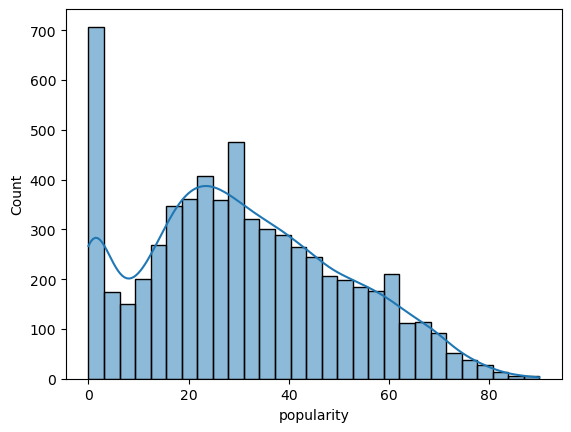

In [29]:
sns.histplot(data=df_spotify, x='popularity', palette='viridis', kde=True)

- The distribution is right-skewed, meaning that there are a few songs with very high popularity scores, but the majority of songs have lower popularity scores.
- There is a large peak at the lowest popularity score, indicating a significant number of songs have a popularity score of 0.
- The majority of songs have low popularity scores, with a substantial number having a score of 0. This could include newly released songs or those that have not gained much attention.
- The right-skewed nature of the distribution indicates that while there are some highly popular songs, they are relatively rare compared to the large number of less popular songs.
- The smaller peaks around 20, 30, and 50 suggest that these popularity scores are more frequent. These could be songs that are moderately well-known or have niche followings.

### 9. How many songs are there in total in the dataset?

In [30]:
df_spotify['name'].count()

6300

There are 6300 songs in this dataset.

### 10. What is the median duration of songs in the dataset?

In [31]:
df_spotify['duration_hhmmss'].median()

Timedelta('0 days 00:03:11')

The median duration is 3 minutes and 11 seconds.

## Bivariate Analysis

### 1. Is there a correlation between song duration and popularity?

In [35]:
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   id               6300 non-null   object         
 1   name             6300 non-null   object         
 2   genre            6300 non-null   object         
 3   artists          6300 non-null   object         
 4   album            6300 non-null   object         
 5   popularity       6300 non-null   int64          
 6   duration_ms      6300 non-null   int64          
 7   explicit         6300 non-null   bool           
 8   duration_hhmmss  6300 non-null   timedelta64[ns]
dtypes: bool(1), int64(2), object(5), timedelta64[ns](1)
memory usage: 400.0+ KB


In [37]:
df_spotify[['popularity','duration_hhmmss']].corr()

popularity  duration_hhmmss
popularity         1.000000         0.022943
duration_hhmmss    0.022943         1.000000

The correlation coefficient is 0.022 between popularity and duration.
This number is a very insignificant number therefore we can say that there is no correlation between song duration and popularity.

### 2. How does the popularity of songs vary across different genres?

In [43]:
pop_genre = df_spotify.groupby(by='genre')['popularity'].mean().reset_index()

In [44]:
pop_genre.sort_values(by='popularity',ascending=False)

genre  popularity
99                rock       60.34
21               dance       57.52
86                 pop       57.32
116             summer       57.06
20             country       56.50
83               party       54.22
110              sleep       53.64
100        rock-n-roll       53.54
47               happy       52.82
112               soul       52.54
68                kids       49.68
55               house       48.62
27              disney       47.08
26               disco       46.54
82              pagode       44.70
38                funk       44.70
103                sad       44.32
10              brazil       41.78
97           reggaeton       41.68
34                 emo       40.74
16               chill       40.58
73               metal       40.54
96              reggae       40.14
117            swedish       39.70
119              tango       38.88
80         new-release       38.58
15            children       38.54
105              samba       38.24
18                club       38.00
120             techno       37.78
8                blues       37.56
63              j-idol       36.68
104              salsa       36.50
65              j-rock       36.42
56                 idm       36.36
50           hardstyle       36.30
92                punk       36.28
46              guitar       36.20
95           rainy-day       35.60
44              groove       35.32
49            hardcore       34.84
23         death-metal       34.80
94               r-n-b       34.56
121             trance       34.34
81               opera       34.24
106          sertanejo       34.16
64               j-pop       34.14
102            romance       34.10
48           hard-rock       33.56
57              indian       33.28
53            holidays       33.02
4              ambient       32.60
77              movies       31.98
72            mandopop       31.96
29                 dub       31.66
109                ska       31.62
75           metalcore       31.60
66                jazz       31.50
114            spanish       31.08
51         heavy-metal       31.04
84     philippines-opm       30.94
107         show-tunes       30.72
2             alt-rock       30.18
28       drum-and-bass       30.14
69               latin       30.06
42                goth       29.74
19              comedy       29.42
41              gospel       29.32
54          honky-tonk       29.12
67               k-pop       28.60
45              grunge       27.74
17           classical       27.72
5                anime       27.44
1             afrobeat       27.00
3          alternative       26.72
32             electro       26.62
79             new-age       26.30
0             acoustic       26.28
37              french       26.28
52             hip-hop       25.82
6          black-metal       25.68
9            bossanova       25.52
124           work-out       25.32
62             j-dance       25.16
7            bluegrass       25.02
98           road-trip       24.94
22           dancehall       24.76
70              latino       24.54
93           punk-rock       24.50
36               forro       23.28
123            turkish       23.12
89           power-pop       23.08
122           trip-hop       23.00
115              study       22.96
31                 edm       22.90
125        world-music       22.56
71               malay       21.96
12             british       21.90
13            cantopop       21.60
39              garage       20.86
40              german       20.84
91          psych-rock       20.72
118          synth-pop       19.90
78                 mpb       19.72
108  singer-songwriter       19.62
59           indie-pop       19.56
30             dubstep       19.50
58               indie       19.24
85               piano       19.18
24          deep-house       16.92
60          industrial       16.86
113        soundtracks       16.38
61             iranian       16.36
33          electronic     

Here, we can see that for Rock music, the mean popularity score is 60.34. Similarly, for dancem 57.52 and so on.

### 3. What is the relationship between the number of songs an artist has and their average popularity?

In [54]:
artist_stats = df_spotify.groupby('artists').agg(
    num_songs=('popularity', 'size'),
    avg_popularity=('popularity', 'mean')
).reset_index()


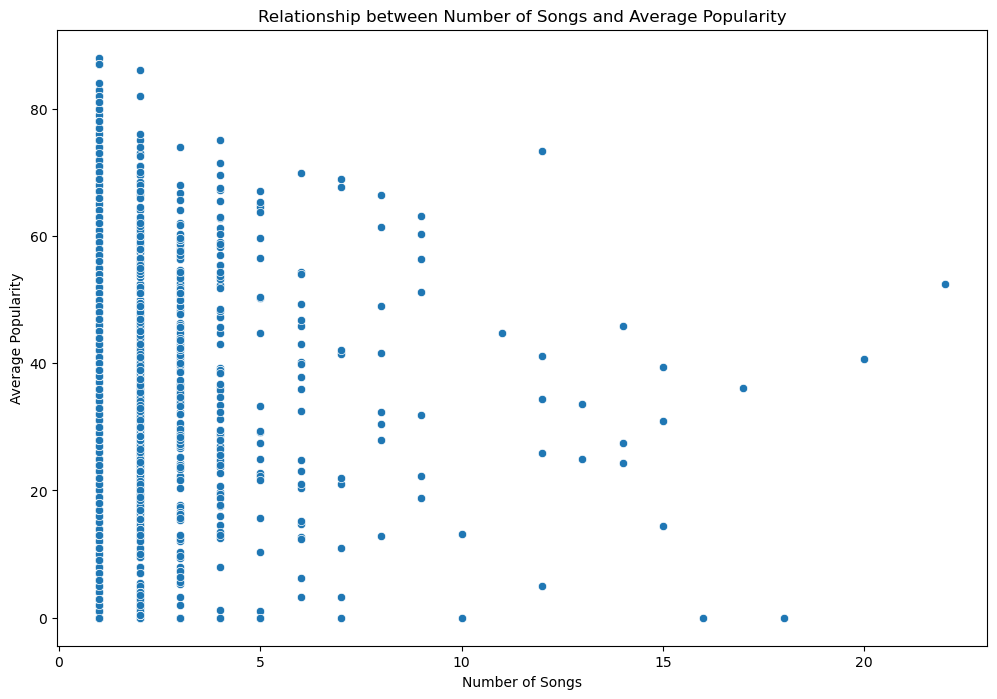

In [55]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='num_songs', y='avg_popularity', data=artist_stats)
plt.title('Relationship between Number of Songs and Average Popularity')
plt.xlabel('Number of Songs')
plt.ylabel('Average Popularity')
plt.show()

Here, we observe a non-linear relationship. We can see that the number of songs from an artist is not correlated to the average popularity as we see lesser number of songs an artist has seem to have high popularity scores.

### 4. Do explicit songs tend to be more or less popular than non-explicit songs?

In [58]:
df_spotify.columns

Index(['id', 'name', 'genre', 'artists', 'album', 'popularity', 'duration_ms',
       'explicit', 'duration_hhmmss'],
      dtype='object')

In [59]:
df_spotify.groupby(by='explicit')['popularity'].mean().reset_index()

explicit  popularity
0     False   30.073639
1      True   33.667504

From this, we can say that explicit songs **do** tend to be more popular than non-explicit songs.

### 5. How does the duration of songs vary across different genres?

In [60]:
df_spotify.columns

Index(['id', 'name', 'genre', 'artists', 'album', 'popularity', 'duration_ms',
       'explicit', 'duration_hhmmss'],
      dtype='object')

In [63]:
df_spotify.groupby(by='genre')['duration_hhmmss'].mean().sort_values(ascending=False).reset_index()

genre        duration_hhmmss
0             afrobeat 0 days 00:05:14.920000
1       detroit-techno 0 days 00:04:52.840000
2                piano 0 days 00:04:44.080000
3           electronic 0 days 00:04:40.260000
4          black-metal 0 days 00:04:38.120000
5       minimal-techno 0 days 00:04:22.400000
6        chicago-house 0 days 00:04:19.160000
7             mandopop 0 days 00:04:13.060000
8                metal 0 days 00:04:10.840000
9           industrial 0 days 00:04:07.760000
10             hip-hop 0 days 00:04:04.020000
11           power-pop 0 days 00:04:02.140000
12              grunge 0 days 00:04:01.600000
13           breakbeat 0 days 00:03:56.360000
14             iranian 0 days 00:03:54.520000
15       drum-and-bass 0 days 00:03:54.420000
16     philippines-opm 0 days 00:03:52.740000
17            cantopop 0 days 00:03:52.420000
18         death-metal 0 days 00:03:49.460000
19               malay 0 days 00:03:47.840000
20              gospel 0 days 00:03:47.100000
21              latino 0 days 00:03:47.060000
22             swedish 0 days 00:03:45.460000
23                 mpb 0 days 00:03:42.780000
24          metal-misc 0 days 00:03:42.660000
25          psych-rock 0 days 00:03:42.460000
26         rock-n-roll 0 days 00:03:41.920000
27            children 0 days 00:03:41.260000
28              pagode 0 days 00:03:39.480000
29              groove 0 days 00:03:38.060000
30           reggaeton 0 days 00:03:38.020000
31           rainy-day 0 days 00:03:37.660000
32               opera 0 days 00:03:37.120000
33                rock 0 days 00:03:36.200000
34        post-dubstep 0 days 00:03:35.700000
35              j-idol 0 days 00:03:34.300000
36               party 0 days 00:03:33.940000
37             j-dance 0 days 00:03:33.560000
38               r-n-b 0 days 00:03:32.840000
39             romance 0 days 00:03:32.080000
40              j-rock 0 days 00:03:30.340000
41               salsa 0 days 00:03:30.300000
42               dance 0 days 00:03:28.700000
43               latin 0 days 00:03:28.580000
44          songwriter 0 days 00:03:28.580000
45              reggae 0 days 00:03:28.180000
46         heavy-metal        0 days 00:03:28
47               sleep 0 days 00:03:27.860000
48               disco 0 days 00:03:27.680000
49                soul 0 days 00:03:27.540000
50   singer-songwriter 0 days 00:03:27.420000
51               house 0 days 00:03:26.840000
52                funk 0 days 00:03:26.700000
53              summer 0 days 00:03:26.080000
54               indie        0 days 00:03:26
55               tango 0 days 00:03:25.040000
56                kids        0 days 00:03:25
57             dubstep 0 days 00:03:23.120000
58               samba 0 days 00:03:22.960000
59             country 0 days 00:03:22.540000
60               forro 0 days 00:03:21.840000
61           synth-pop 0 days 00:03:21.320000
62             new-age 0 days 00:03:20.220000
63                 sad 0 days 00:03:19.120000
64              indian 0 days 00:03:18.360000
65   progressive-house 0 days 00:03:18.060000
66               blues 0 days 00:03:17.280000
67              techno 0 days 00:03:17.260000
68         new-release 0 days 00:03:17.060000
69            alt-rock 0 days 00:03:16.920000
70          show-tunes 0 days 00:03:16.300000
71            holidays 0 days 00:03:15.160000
72             turkish 0 days 00:03:14.760000
73             spanish 0 days 00:03:14.720000
74                 emo 0 days 00:03:13.600000
75             electro 0 days 00:03:13.340000
76                 edm 0 days 00:03:13.020000
77           classical        0 days 00:03:13
78              movies 0 days 00:03:12.860000
79           dancehall 0 days 00:03:12.760000
80           bossanova 0 days 00:03:12.520000
81            acoustic 0 days 00:03:11.900000
82              garage 0 days 00:03:10.020000
83           metalcore 0 days 00:03:09.820000
84                 idm 0 days 00:03:09.480000
85            trip-hop 0 days 00:03:09.120000
86         alte

From this, we can see that afrobeat songs have the highest average duration of 5 minutes and 14 seconds, followed by detroit-techno at 4 minutes and 52 seconds.\
Similarly, grindcore has the lowest average duration at 1 minute and 59 seconds, followed by german at the second lowest which is 2 minutes.

### 6. How do different albums by the same artist compare in terms of popularity?

In [64]:
df_spotify.columns

Index(['id', 'name', 'genre', 'artists', 'album', 'popularity', 'duration_ms',
       'explicit', 'duration_hhmmss'],
      dtype='object')

In [68]:
album_stats = df_spotify.groupby(['artists', 'album']).agg(
    avg_popularity=('popularity', 'mean')
).reset_index()
album_stats

artists  \
0                                   "Weird Al" Yankovic   
1                                   "Weird Al" Yankovic   
2                                         $anto, Satsu¿   
3                                   $tupid Young, Mozzy   
4                              $uicideboy$, Black Smurf   
5                                   (((()))), surround.   
6                                              (G)I-DLE   
7                                              (G)I-DLE   
8                                              (G)I-DLE   
9                                              (G)I-DLE   
10                                               *NSYNC   
11                                               *NSYNC   
12                                     009 Sound System   
13                                                 0171   
14                                              03 Amos   
15                                                 0to8   
16                                                 0to8   
17                                   10 Ft. Ganja Plant   
18                                       10,000 Maniacs   
19                                                  112   
20                                                 1349   
21                                                  13C   
22    1996, D.masta, Smoky Mo, Rigos, Slovetskii, Кр...   
23                             1i1 pimple, lil benjiman   
24                                              1ndicos   
25                       1nonly, Ciscaux, Wassup Rocker   
26                                1nonly, Freddie Dredd   
27                                 1nonly, lilbubblegum   
28                                  2 cool for the pool   
29                                                20/20   
30                  21 Savage, Young Thug, Metro Boomin   
31                                            2KE, VELO   
32                                            2KE, VELO   
33                                                  2PM   
34                                      2Pac, Nate Dogg   
35                     2Pac, Young Buck, Chamillionaire   
36                                         2kupzz, Gemi   
37                              303bugworld, popmonst3r   
38                     310babii, OHGEESY, BlueBucksClan   
39                                                  311   
40                                                  311   
41                                                  311   
42                                             331Music   
43                                             331Music   
44                                                3OH!3   
45                                        3mason, Pooch   
46                                                 4.4c   
47                               42nd Royal Highlanders   
48                                          432Hz Piano   
49                                  5 Seconds of Summer   
50                                              50 Cent   
51                                              50 Cent   
52                           50 Cent, Jeremih, Lil Durk   
53                                                   5L   
54                                         5ht the Band   
55                                       666FUCKTHECOPS   
56                                               6DooN7   
57                                   6YNTHMANE, RXDXVIL   
58                                   6YNTHMANE, RXDXVIL   
59                                   6YNTHMANE, RXDXVIL   
60                         6YNTHMANE, RXDXVIL, Kordhell   
61                       6arelyhuman, asteria, kets4eki   
62                                               7osiah   
63                                             80purppp   
64                                     88 Fingers Louie   
65                                8CTO GVNG, Zax Prynce   
66    954mari, Jhbboss, BlvkDivmonds, Connor Quest!,...   
67                                  

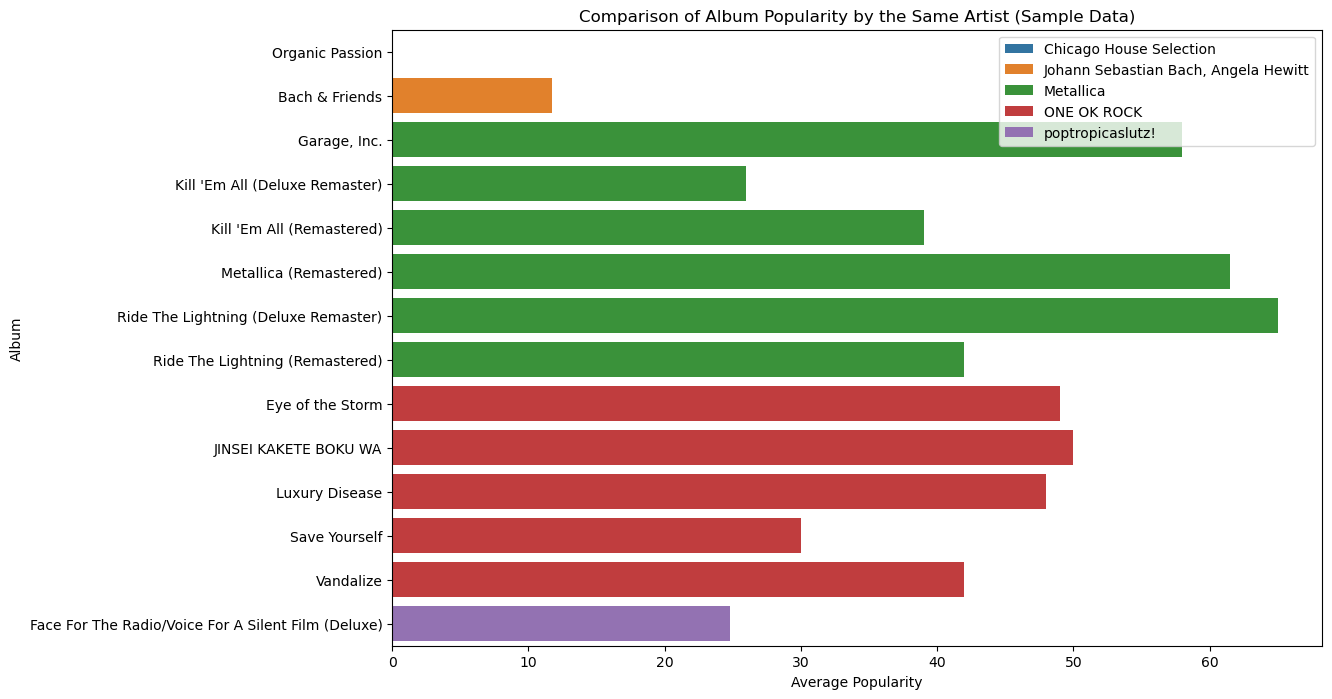

In [74]:
df_sample = df_spotify.sample(frac=0.2, random_state=1)

# Focus on a few artists (top 5 artists with the most songs)
top_artists = df_sample['artists'].value_counts().head(5).index
df_sample = df_sample[df_sample['artists'].isin(top_artists)]

# Aggregate data by artist and album
album_stats = df_sample.groupby(['artists', 'album']).agg(
    avg_popularity=('popularity', 'mean')
).reset_index()

# Plot the relationship
plt.figure(figsize=(12, 8))
sns.barplot(x='avg_popularity', y='album', hue='artists', data=album_stats, dodge=False)
plt.title('Comparison of Album Popularity by the Same Artist (Sample Data)')
plt.xlabel('Average Popularity')
plt.ylabel('Album')
plt.legend(loc='upper right')
plt.show()

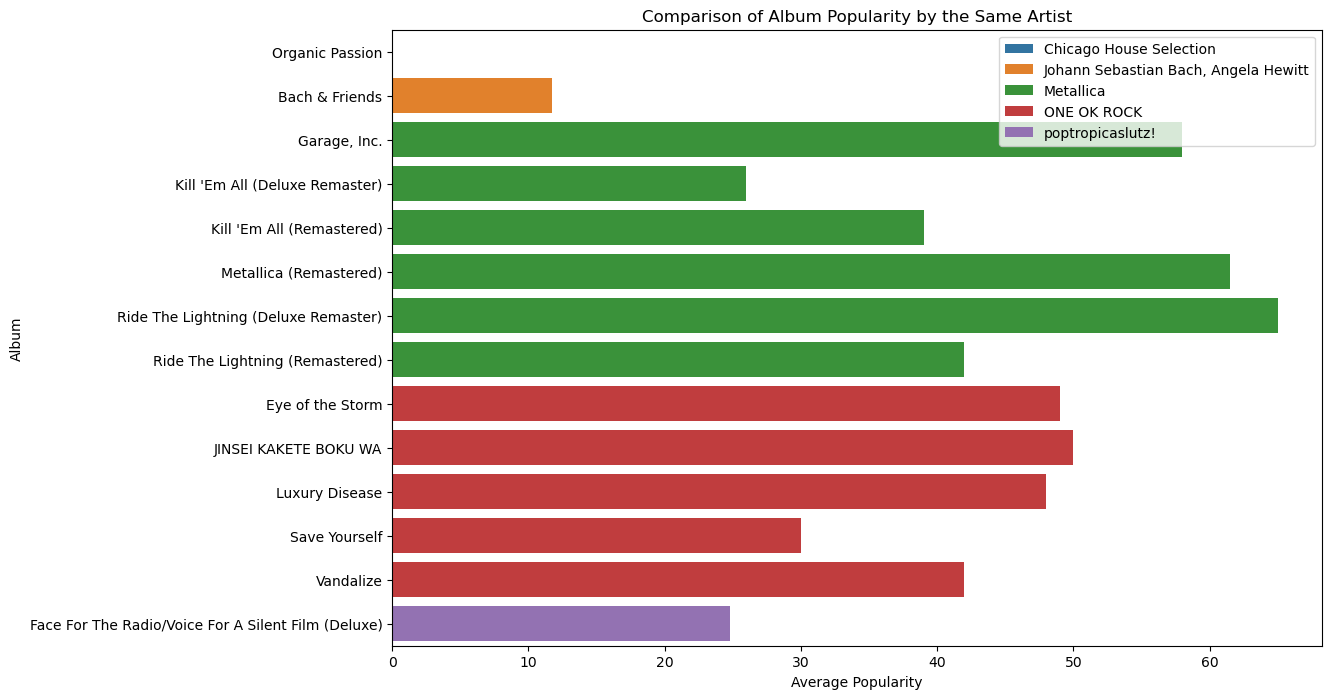

In [75]:
plt.figure(figsize=(12, 8))
sns.barplot(x='avg_popularity', y='album', hue='artists', data=album_stats, dodge=False)
plt.title('Comparison of Album Popularity by the Same Artist')
plt.xlabel('Average Popularity')
plt.ylabel('Album')
plt.legend(loc='upper right')
plt.show()

- poptripicalsultz: Has albums with moderate popularity, with "Garage, Inc." being one of the more popular albums.
- Metallica: Has multiple albums with relatively high popularity scores. Albums like "Ride The Lightning (Deluxe Remaster)" and "Kill 'Em All (Remastered)" are particularly popular.
- ONE OK ROCK: Albums have a higher average popularity, with "Eye of the Storm" and "Luxury Disease" being the most popular.
- Johann Sebastian Bach, Angela Hewitt: The album "Bach & Friends" has lower popularity compared to other artists' albums.
- Chicago House Selection: The album "Organic Passion" has the lowest average popularity among the albums shown.

So we can say that
- ONE OK ROCK has the most consistently high average popularity among its albums.
- Metallica also has high popularity, with many albums scoring above average.
- Johann Sebastian Bach, Angela Hewitt and Chicago House Selection have lower average popularity for their albums.

### 7. What is the distribution of song durations for explicit and non-explicit songs?

In [77]:
df_spotify.groupby(by='explicit')['duration_hhmmss'].mean().reset_index()

explicit           duration_hhmmss
0     False 0 days 00:03:25.145710928
1      True 0 days 00:03:10.586264656

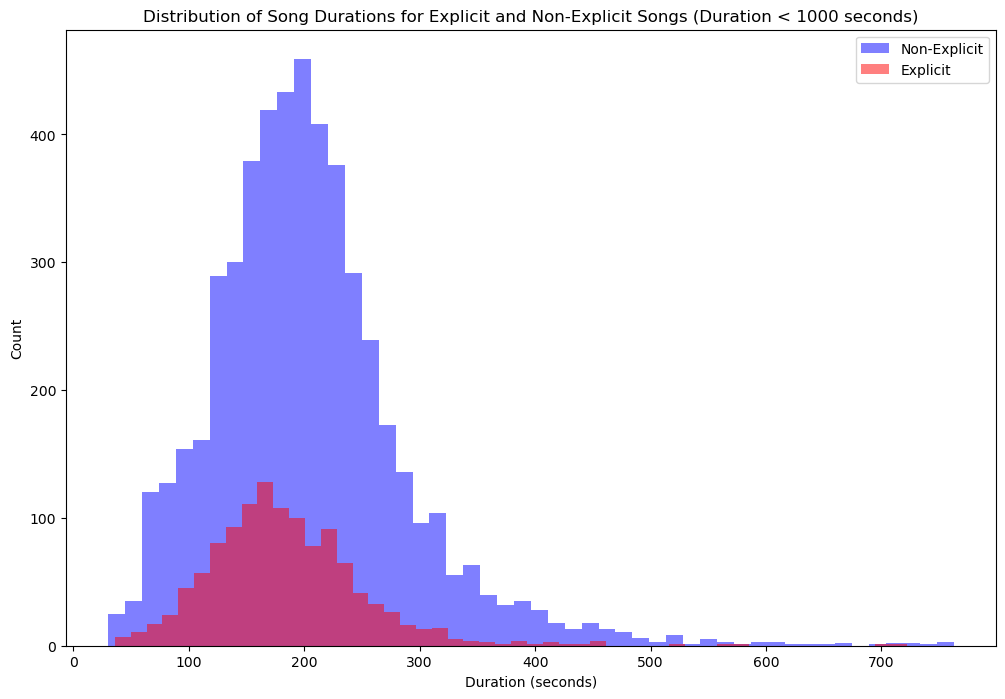

In [85]:
df_spotify['duration_sec'] = df_spotify['duration_ms'] / 1000

filtered_df = df_spotify[df_spotify['duration_sec'] < 800]

# Plot the histograms for explicit and non-explicit songs
plt.figure(figsize=(12, 8))
bins = 50

# Plotting non-explicit songs
plt.hist(filtered_df[filtered_df['explicit'] == False]['duration_sec'], bins=bins, alpha=0.5, label='Non-Explicit', color='blue')

# Plotting explicit songs
plt.hist(filtered_df[filtered_df['explicit'] == True]['duration_sec'], bins=bins, alpha=0.5, label='Explicit', color='red')

# Adding titles and labels
plt.title('Distribution of Song Durations for Explicit and Non-Explicit Songs (Duration < 1000 seconds)')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()

The distributions for both are the same, with the mean having a very small difference of 15 seconds.

### 8. How does the number of songs in an album correlate with the album's average popularity?

In [91]:
df_spotify.columns

Index(['id', 'name', 'genre', 'artists', 'album', 'popularity', 'duration_ms',
       'explicit', 'duration_hhmmss', 'duration_sec'],
      dtype='object')

In [97]:
df_album_songs = df_spotify.groupby(by='album')['name'].count().reset_index()
df_album_songs

album  name
0                                    ! ! Quiet Lofi ! !     1
1                                      !!Going Places!!     1
2                                              ##before     1
3     #01 Music to Calm Down, for Bedtime, Yoga, the...     1
4     #01 Soft Music for Night Sleep, Relaxation, Me...     1
5                                                    #1     1
6                                 #1s ... and then some     2
7                                                    #4     2
8                                                 #gigi     2
9                                                #miles     1
10                                   $AD BOYZ 4 LIFE II     3
11                                    (The) New Release     1
12                                        ... and Stuff     1
13    ...And Justice for All (Remastered Deluxe Box ...     3
14                  ...And Justice for All (Remastered)     1
15                              ...And Then There Was X     1
16                                ...Comes With a Price     2
17                                                  004     1
18                                     009 Sound System     1
19                                       0900-BOOTYCALL     1
20    1 Hours Hyper Focus: Beta Waves for Concentrat...     1
21                                      1, 2, 3 Soleils     1
22                     100 Dubstep Hot Hits DJ Mix 2015     2
23                                100 Fiedler Favorites     1
24                          100 Greatest Bluegrass Hits    15
25                           100 Greatest Workout Songs     5
26    100 National Anthems Around, of, and from the ...     1
27                                 100% Grupo Revelação     1
28                             1050 Years of Pagan Cult     1
29                                                11/11     1
30                                        12 Bar Bruise     1
31                                  12 Odd Future Songs     1
32                                    15 Anos (Ao Vivo)     2
33                                      15 Rockin Years     1
34                                      16 Biggest Hits     1
35                                             16 Vibes     1
36                               16:13-14 @collinzmusic     1
37                                       17 Year Bender     1
38                     18 Greatest Hits: Lani Misalucha     2
39                                                 1975     1
40                                       1977 - Best of     1
41                                              1987 EP     1
42             1989 (Big Machine Radio Release Special)     1
43                                                 1999     1
44                                         19NaughtyIII     1
45                                                 1SAD     1
46                                                 1of1     3
47          1st Album [Dystopia : The Tree of Language]     1
48                                                    2     2
49                                              2 Alivë     1
50                                  2 Alivë (Geëk Pack)     2
51                                                 2 Am     1
52                                        2 Pé na Porta     1
53                                                   20     1
54                          20 #1’s: Singer-Songwriters     1
55        20 Grandes Sucessos De Quarteto Em Cy & Mpb-4     2
56                                                20/20     2
57                                      2000's Pop Hits     1
58                                                 2009     1
59                                            2013-2015     1
60                                                 2017     1
61                    2021 Compilation Volume 1 (Metal)     1
62                                    25 Anos (Ao Vivo)     2
63                                                 25/7     1
64                  

In [98]:
df_album_pop = df_spotify.groupby(by='album')['popularity'].mean().reset_index()
df_album_pop

album  popularity
0                                    ! ! Quiet Lofi ! !   12.000000
1                                      !!Going Places!!   43.000000
2                                              ##before    2.000000
3     #01 Music to Calm Down, for Bedtime, Yoga, the...   21.000000
4     #01 Soft Music for Night Sleep, Relaxation, Me...   12.000000
5                                                    #1   27.000000
6                                 #1s ... and then some   35.000000
7                                                    #4   12.000000
8                                                 #gigi   18.500000
9                                                #miles   54.000000
10                                   $AD BOYZ 4 LIFE II   74.333333
11                                    (The) New Release   26.000000
12                                        ... and Stuff   16.000000
13    ...And Justice for All (Remastered Deluxe Box ...   44.000000
14                  ...And Justice for All (Remastered)   52.000000
15                              ...And Then There Was X   65.000000
16                                ...Comes With a Price   31.500000
17                                                  004   37.000000
18                                     009 Sound System   44.000000
19                                       0900-BOOTYCALL    1.000000
20    1 Hours Hyper Focus: Beta Waves for Concentrat...   42.000000
21                                      1, 2, 3 Soleils    9.000000
22                     100 Dubstep Hot Hits DJ Mix 2015    0.000000
23                                100 Fiedler Favorites   12.000000
24                          100 Greatest Bluegrass Hits   23.533333
25                           100 Greatest Workout Songs   15.800000
26    100 National Anthems Around, of, and from the ...   11.000000
27                                 100% Grupo Revelação   59.000000
28                             1050 Years of Pagan Cult   29.000000
29                                                11/11   32.000000
30                                        12 Bar Bruise   18.000000
31                                  12 Odd Future Songs   36.000000
32                                    15 Anos (Ao Vivo)   60.500000
33                                      15 Rockin Years   25.000000
34                                      16 Biggest Hits   51.000000
35                                             16 Vibes   56.000000
36                               16:13-14 @collinzmusic   10.000000
37                                       17 Year Bender   11.000000
38                     18 Greatest Hits: Lani Misalucha   36.000000
39                                                 1975   58.000000
40                                       1977 - Best of   17.000000
41                                              1987 EP   34.000000
42             1989 (Big Machine Radio Release Special)   32.000000
43                                                 1999   43.000000
44                                         19NaughtyIII   63.000000
45                                                 1SAD    0.000000
46                                                 1of1   44.000000
47          1st Album [Dystopia : The Tree of Language]   44.000000
48                                                    2   68.500000
49                                              2 Alivë   63.000000
50                                  2 Alivë (Geëk Pack)   34.000000
51                                                 2 Am   14.000000
52                                        2 Pé na Porta    1.000000
53                                                   20   27.000000
54                          20 #1’s: Singer-Songwriters    4.000000
55        20 Grandes Sucessos De Quarteto Em Cy & Mpb-4   28.500000
56                                                20/20   19.500000
57                                      2000's Pop Hits   29.000000
58                                    

In [101]:
df_album_stats = pd.merge(df_album_songs, df_album_pop, on='album')
df_album_stats

album  name  popularity
0                                    ! ! Quiet Lofi ! !     1   12.000000
1                                      !!Going Places!!     1   43.000000
2                                              ##before     1    2.000000
3     #01 Music to Calm Down, for Bedtime, Yoga, the...     1   21.000000
4     #01 Soft Music for Night Sleep, Relaxation, Me...     1   12.000000
5                                                    #1     1   27.000000
6                                 #1s ... and then some     2   35.000000
7                                                    #4     2   12.000000
8                                                 #gigi     2   18.500000
9                                                #miles     1   54.000000
10                                   $AD BOYZ 4 LIFE II     3   74.333333
11                                    (The) New Release     1   26.000000
12                                        ... and Stuff     1   16.000000
13    ...And Justice for All (Remastered Deluxe Box ...     3   44.000000
14                  ...And Justice for All (Remastered)     1   52.000000
15                              ...And Then There Was X     1   65.000000
16                                ...Comes With a Price     2   31.500000
17                                                  004     1   37.000000
18                                     009 Sound System     1   44.000000
19                                       0900-BOOTYCALL     1    1.000000
20    1 Hours Hyper Focus: Beta Waves for Concentrat...     1   42.000000
21                                      1, 2, 3 Soleils     1    9.000000
22                     100 Dubstep Hot Hits DJ Mix 2015     2    0.000000
23                                100 Fiedler Favorites     1   12.000000
24                          100 Greatest Bluegrass Hits    15   23.533333
25                           100 Greatest Workout Songs     5   15.800000
26    100 National Anthems Around, of, and from the ...     1   11.000000
27                                 100% Grupo Revelação     1   59.000000
28                             1050 Years of Pagan Cult     1   29.000000
29                                                11/11     1   32.000000
30                                        12 Bar Bruise     1   18.000000
31                                  12 Odd Future Songs     1   36.000000
32                                    15 Anos (Ao Vivo)     2   60.500000
33                                      15 Rockin Years     1   25.000000
34                                      16 Biggest Hits     1   51.000000
35                                             16 Vibes     1   56.000000
36                               16:13-14 @collinzmusic     1   10.000000
37                                       17 Year Bender     1   11.000000
38                     18 Greatest Hits: Lani Misalucha     2   36.000000
39                                                 1975     1   58.000000
40                                       1977 - Best of     1   17.000000
41                                              1987 EP     1   34.000000
42             1989 (Big Machine Radio Release Special)     1   32.000000
43                                                 1999     1   43.000000
44                                         19NaughtyIII     1   63.000000
45                                                 1SAD     1    0.000000
46                                                 1of1     3   44.000000
47          1st Album [Dystopia : The Tree of Language]     1   44.000000
48                                                    2     2   68.500000
49                                              2 Alivë     1   63.000000
50                                  2 Alivë (Geëk Pack)     2   34.000000
51                                                 2 Am     1   14.000000
52                                        2 Pé na Porta     1    1.000000
53                                                   2

<Axes: xlabel='name', ylabel='popularity'>

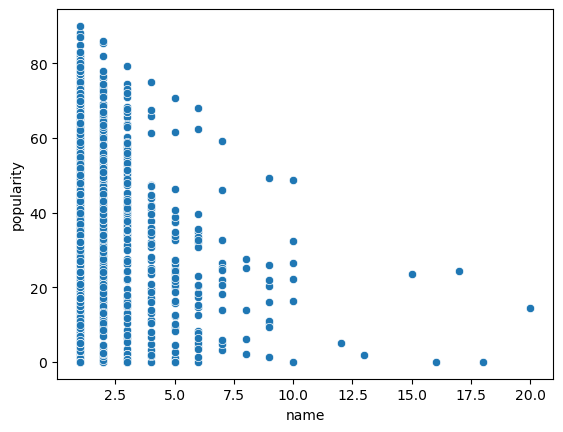

In [102]:
sns.scatterplot(data=df_album_stats, x='name',y='popularity')

In [104]:
correlation = df_album_stats['name'].corr(df_album_stats['popularity'])
print(f'Correlation between number of songs and average popularity: {correlation:.2f}')

Correlation between number of songs and average popularity: -0.05


Here, we can see that the lesser number of songs results in a more average popularity. We also see a negative correlation coefficent but the value itself (0.05) is quite small hence we can say there is an insignificant relationship between the two.